In [2]:
# imports
import numpy
numpy.random.seed(1234)
import tensorflow as tf
tf.set_random_seed(1234)
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [3]:
# Parameters
W = tf.Variable([0.5], tf.float32)
b = tf.Variable([0.5], tf.float32)

In [4]:
# Model
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

In [5]:
# loss
loss_ = tf.reduce_mean(tf.square(linear_model - y)) # sum of the squares

In [6]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(1e-4)
train_ = optimizer.minimize(loss_)

In [7]:
# Data
mean = [3, 2]
cov = [[3, 1], [40, 50]]
x_train, y_train = numpy.random.multivariate_normal(mean, cov, 500).T

In [8]:
xmin = x_train.min()-5
xmax = x_train.max()+5
def plot(w,b):
  axes = plt.gca()
  axes.set_xlim([-20,30])
  axes.set_ylim([-20,30])
  plt.plot(x_train, y_train, 'b.')
  plt.plot([xmin,xmax],[w*xmin+b,w*xmax+b],'r')
  display.clear_output(wait=True)
  display.display(plt.gcf())
  plt.axis('equal')
  #plt.show()

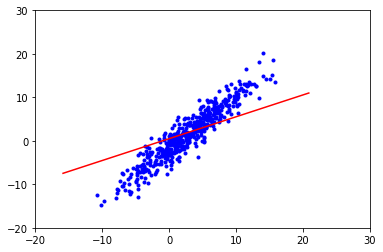

Step      0 MSE loss : 1.504755e+01


In [ ]:
# Training
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) 
for step in range(50000):
  sess.run([train_], {x:x_train, y:y_train})
  if step % 5000 == 0:
    curr_W, curr_b, curr_loss  = sess.run(
                                   [W, b, loss_],
                                   {x:x_train, y:y_train}
                                 )
    plot(curr_W,curr_b)
    print "Step {:6d} MSE loss : {:e}".format(step,curr_loss)